### Understanding a Decision Tree

A decision tree is the building block of a random forest and is an intuitive model. 

We can think of a decision tree as a series of yes/no questions asked about our data eventually leading to a predicted class (or continuous value in the case of regression). This is an interpretable model because it makes classifications much like we do: we ask a sequence of queries about the available data we have until we arrive at a decision (in an ideal world).

The technical details of a decision tree are in how the questions about the data are formed. 

**In the CART algorithm, a decision tree is built by determining the questions (called splits of nodes) that, when answered, lead to the greatest reduction in Gini Impurity. What this means is the decision tree tries to form nodes containing a high proportion of samples (data points) from a single class by finding values in the features that cleanly divide the data into classes.**

<p>
    <img src = assets/1.png height = 400px width = 400px>
</p>

Our data only has two features (predictor variables), x1 and x2 with 6 data points — samples — divided into 2 different labels. Although this problem is simple, it’s not linearly separable, which means that we can’t draw a single straight line through the data to classify the points.


We can however draw a series of straight lines that divide the data points into boxes, which we’ll call nodes. In fact, this is what a decision tree does during training. Effectively, a decision tree is a non-linear model built by constructing many linear boundaries.

#### Visualizing a Decision Tree

So what’s actually going on when we train a decision tree?

<p>
    <img src = assets/2.png height = 600px width = 600px>
</p>

All the nodes, except the leaf nodes (colored terminal nodes), have 5 parts:

- Question asked about the data based on a value of a feature. Each question has either a True or False answer that splits the node. Based on the answer to the question, a data point moves down the tree.
- `gini`: The Gini Impurity of the node. The average weighted Gini Impurity decreases as we move down the tree.
- `samples`: The number of observations in the node.
- `value`: The number of samples in each class. For example, the top node has 2 samples in class 0 and 4 samples in class 1.
- `class`: The majority classification for points in the node. In the case of leaf nodes, this is the prediction for all samples in the node.

**The leaf nodes do not have a question because these are where the final predictions are made. To classify a new point, simply move down the tree, using the features of the point to answer the questions until you arrive at a leaf node where the `class` is the prediction.**

To make see the tree in a different way, we can draw the splits built by the decision tree on the original data.

<p>
    <img src = assets/3.png height = 400px width = 400px>
</p>

Each split is a single line that divides data points into nodes based on feature values. For this simple problem and with no limit on the maximum depth, the divisions place each point in a node with only points of the same class. (Again, later we’ll see that this perfect division of the training data might not be what we want because it can lead to overfitting.)

### Gini Impurity:

**The Gini Impurity of a node is the probability that a randomly chosen sample in a node would be incorrectly labeled if it was labeled by the distribution of samples in the node.** For example, in the top (root) node, there is a 44.4% chance of incorrectly classifying a data point chosen at random based on the sample labels in the node. We arrive at this value using the following equation:

<p>
    <img src = assets/4.png height = 400px width = 400px>
</p>


The Gini Impurity of a node n is 1 minus the sum over all the classes J (for a binary classification task this is 2) of the fraction of examples in each class p_i squared. That might be a little confusing in words, so let’s work out the Gini impurity of the root node.

<p>
    <img src = assets/5.png>
</p>

**At each node, the decision tree searches through the features for the value to split on that results in the greatest reduction in Gini Impurity.**

It then repeats this splitting process in a greedy, recursive procedure until it reaches a maximum depth, or each node contains only samples from one class. The weighted total Gini Impurity at each level of tree must decrease. At the second level of the tree, the total weighted Gini Impurity is 0.333:

<p>
    <img src = assets/6.png>
</p>

**(The Gini Impurity of each node is weighted by the fraction of points from the parent node in that node.)**

Eventually, the weighted total Gini Impurity of the last layer goes to 0 meaning each node is completely pure and there is no chance that a point randomly selected from that node would be misclassified. While this may seem like a positive, it means that the model may potentially be overfitting because the nodes are constructed only using training data.


### When to use Gini Impurity and when to use Entropy?

**They are pretty much the same when it comes to CART Analytics.**

Generally, your performance will not change whether you use Gini impurity or Entropy. 

Laura Elena Raileanu and Kilian Stoffel compared both in "[Theoretical comparison between the gini index and information gain criteria](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf)". The most important remarks were:

- It only matters in 2% of the cases whether you use gini impurity or entropy. 
- Entropy might be a little slower to compute (because it makes use of the logarithm). 

I was once told that **both metrics exist because they emerged in different disciplines of science.**

Also, 
- Gini is intended for continuous attributes and Entropy is for attributes that occur in classes
- Gini is to minimize misclassification while Entropy is for exploratory analysis

### [Intuition behind Gini impurity formula](https://stats.stackexchange.com/a/308886/210548)
### [Gini Impurity derivation](https://stats.stackexchange.com/a/339514/210548)


### Overfitting: Or Why a Forest is better than One Tree:

You might be tempted to ask why not just use one decision tree? It seems like the perfect classifier since it did not make any mistakes! A critical point to remember is that the tree made no mistakes on the training data. We expect this to be the case since we gave the tree the answers and didn’t limit the max depth (number of levels). The objective of a machine learning model is to generalize well to new data it has never seen before.

**Overfitting occurs when we have a very flexible model (the model has a [high capacity](https://www.quora.com/What-are-flexible-statistical-learning-methods/answer/Chekkal-Samir?share=fc6242eb&srid=h2tHX)) which essentially memorizes the training data by fitting it closely. The problem is that the model learns not only the actual relationships in the training data, but also any noise that is present. A flexible model is said to have high variance because the learned parameters (such as the structure of the decision tree) will vary considerably with the training data.
On the other hand, an inflexible model is said to have high bias because it makes assumptions about the training data (it’s biased towards pre-conceived ideas of the data.) For example, a linear classifier makes the assumption that the data is linear and does not have the flexibility to fit non-linear relationships. An inflexible model may not have the capacity to fit even the training data and in both cases — high variance and high bias — the model is not able to generalize well to new data.**


`The balance between creating a model that is so flexible it memorizes the training data versus an inflexible model that can’t learn the training data is known as the bias-variance tradeoff and is a foundational concept in machine learning.`


**The reason the decision tree is prone to overfitting when we don’t limit the maximum depth is because it has unlimited flexibility, meaning that it can keep growing until it has exactly one leaf node for every single observation, perfectly classifying all of them. If you go back to the image of the decision tree and limit the maximum depth to 2 (making only a single split), the classifications are no longer 100% correct. We have reduced the variance of the decision tree but at the cost of increasing the bias.**

**As an alternative to limiting the depth of the tree, which reduces variance (good) and increases bias (bad), we can combine many decision trees into a single ensemble model known as the random forest.**

## Random Forest

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:

- Random sampling of training data points when building trees

When training, each tree in a random forest learns from a random sample of the data points. The samples are drawn with replacement, known as bootstrapping, which means that some samples will be used multiple times in a single tree. The idea is that by training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the entire forest will have lower variance but not at the cost of increasing the bias.

At test time, predictions are made by averaging the predictions of each decision tree. This procedure of training each individual learner on different bootstrapped subsets of the data and then averaging the predictions is known as bagging, short for [**bootstrap aggregating**](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/).

- Random subsets of features considered when splitting nodes

The other main concept in the random forest is that only a [subset of all the features are considered for splitting each node in each decision tree](https://sebastianraschka.com/faq/docs/random-forest-feature-subsets.html). Generally this is set to sqrt(n_features) for classification meaning that if there are 16 features, at each node in each tree, only 4 random features will be considered for splitting the node. (The random forest can also be trained considering all the features at every node as is common in regression.)

**`The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.`**

### REFERENCES:
- [Random Forest Implementation and Explanation](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76)

## Code sample 1: Decision Tree and Random Forests using sklearn

In [1]:
import numpy as np
import pandas as pd

In [2]:
# We create the dataset with only 2 features

X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])


In [4]:
# Single Decision Tree

# Here we quickly build and train a single decision tree on the data using Scikit-Learn. The tree will learn 
# how to separate the points, building a flowchart of questions based on the feature values and the labels. 
# At each stage, the decision tree makes splits by maximizing the reduction in Gini impurity.

# We'll use the default hyperparameters for the decision tree which means it can grow as deep as necessary in 
# order to completely separate the classes. This will lead to overfitting because the model memorizes the 
# training data, and in practice, we usually want to limit the depth of the tree so it can generalize to 
# testing data.

from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [5]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 9 nodes with maximum depth 3.


In [6]:
print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0


In [15]:
# Visualize Decision Tree
# To get a sense of how the decision tree "thinks", it's helpful to visualize the entire structure. This will 
# show each node in the tree which we can use to make new predictions. Because the tree is relatively small, 
# we can understand the entire image.

# First we export the tree as a dot file making sure to label the features and the classes.

from sklearn.tree import export_graphviz

export_graphviz(tree, 'tree.dot', rounded = True,
               feature_names= ['x1', 'x2'],
                class_names=['0', '1'], filled=True)

In [16]:
from subprocess import call

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

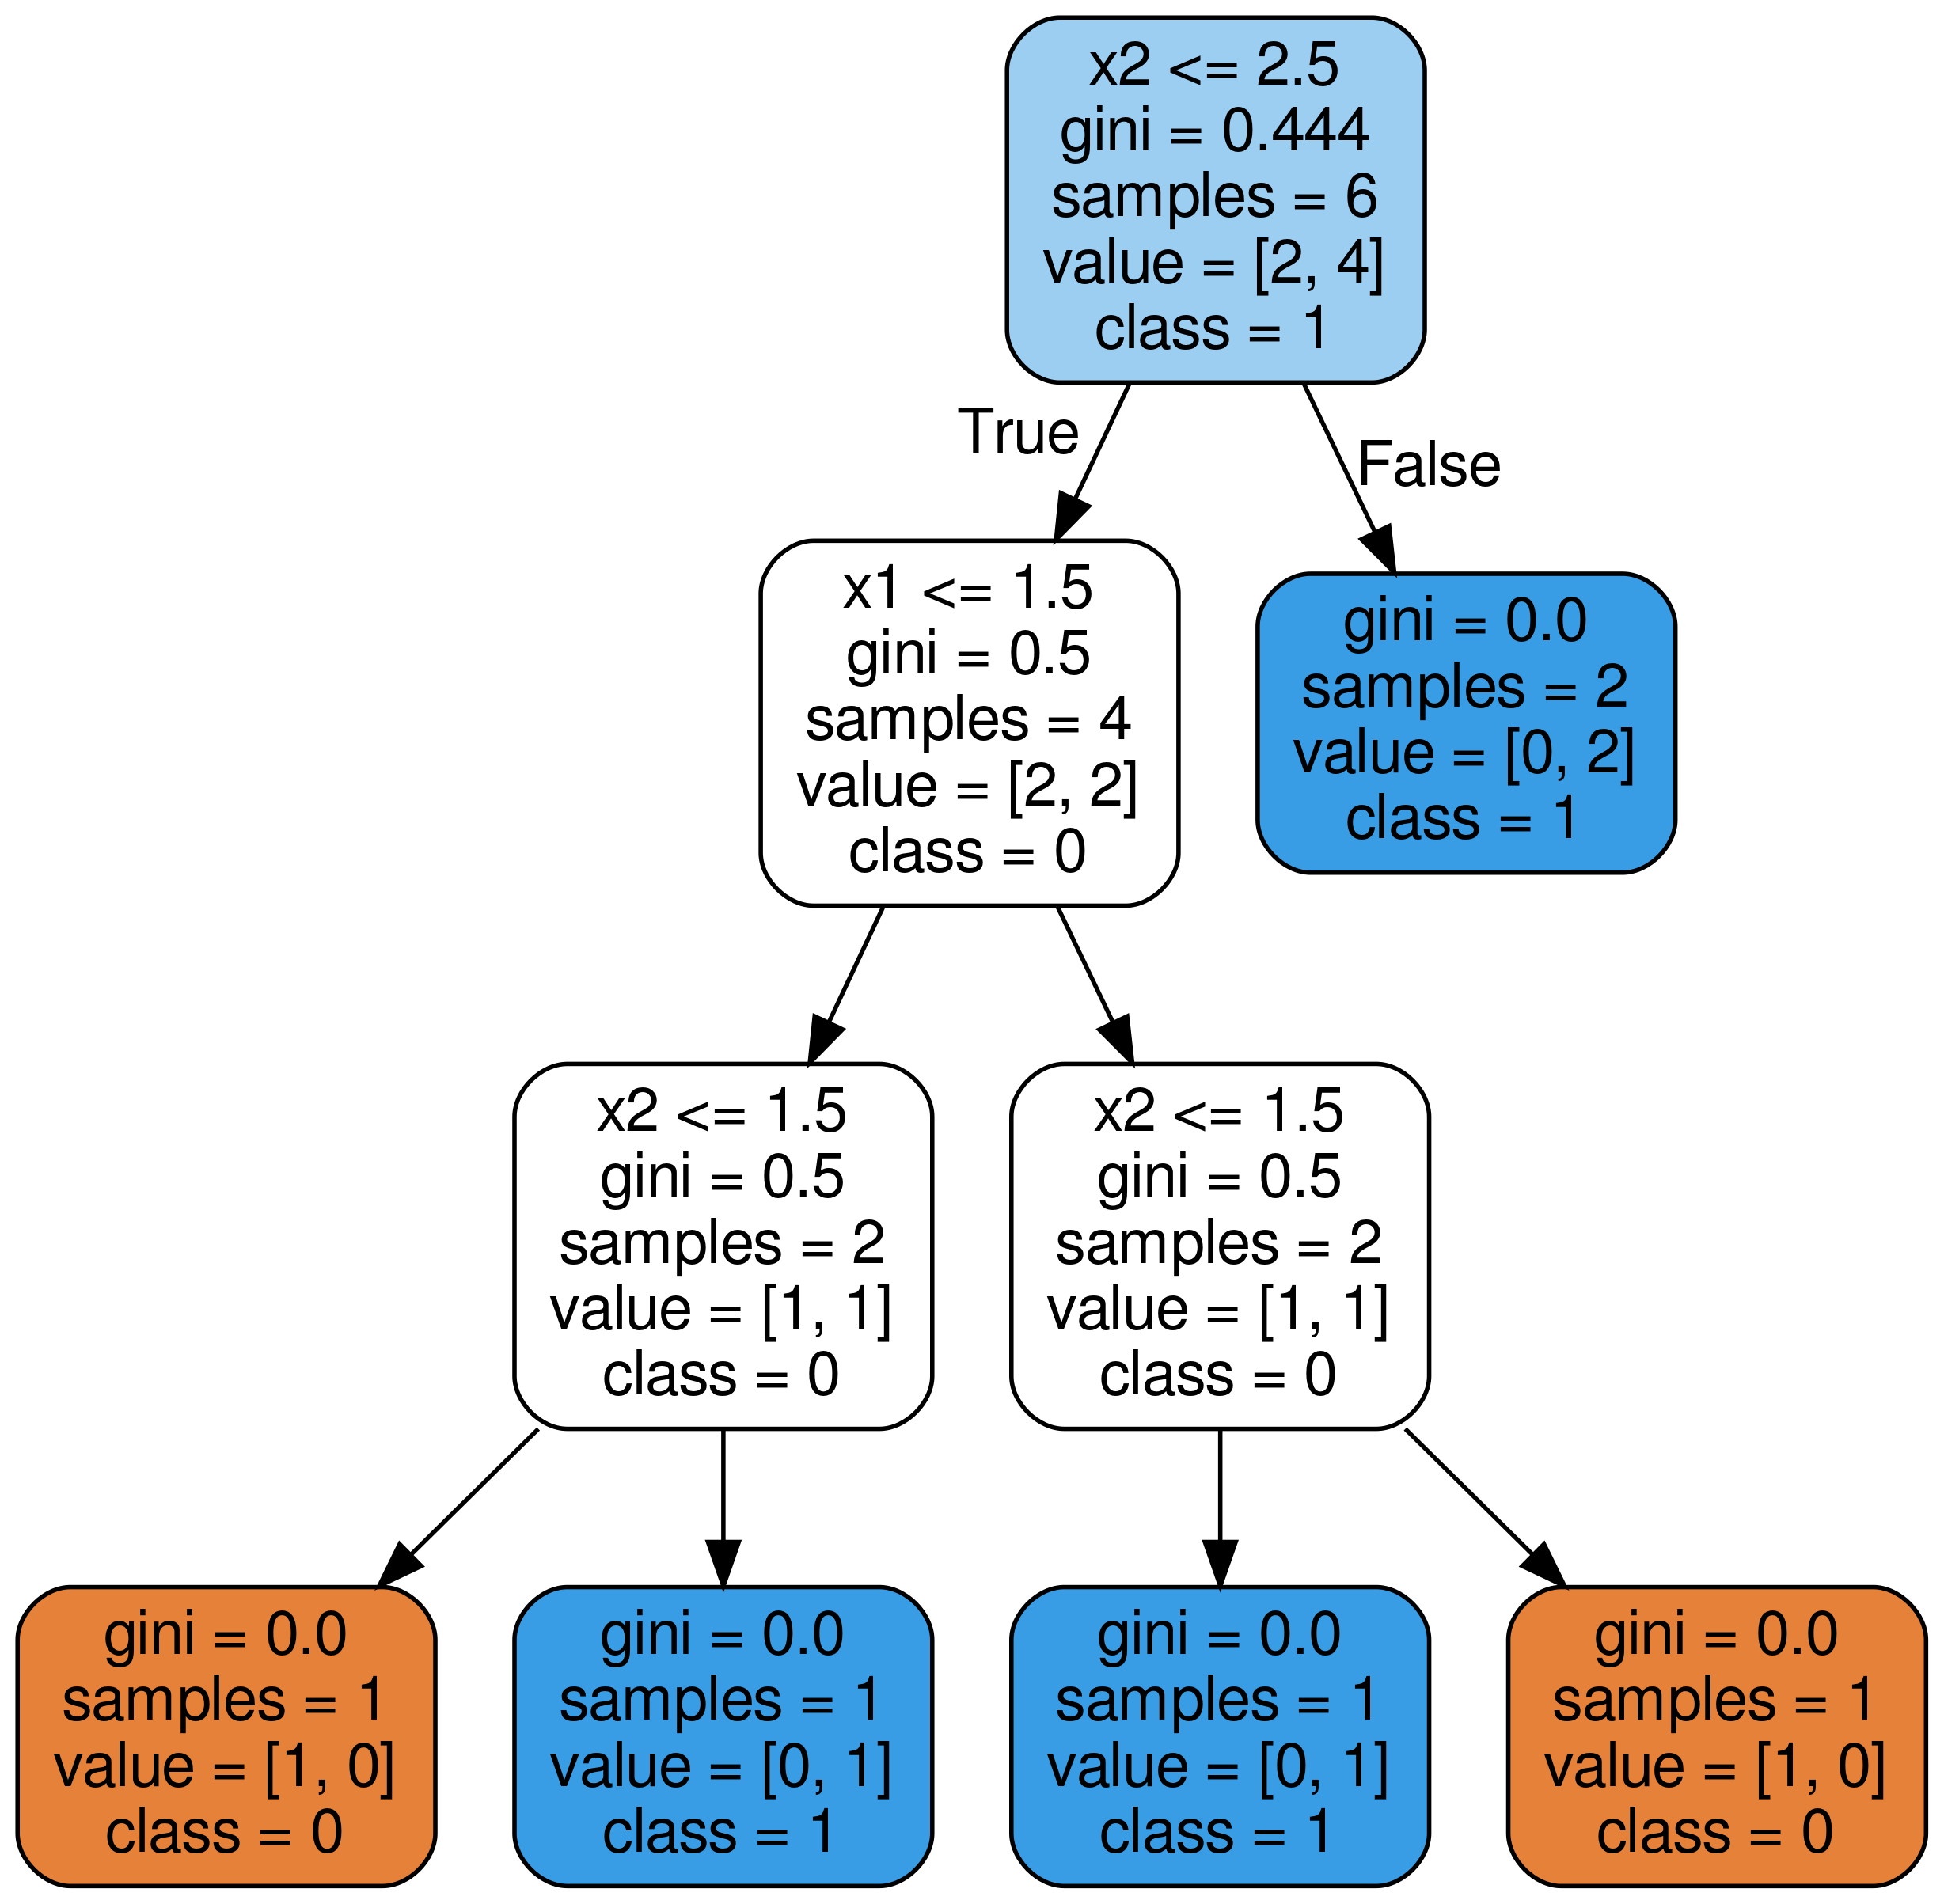

In [17]:
from IPython.display import Image

Image('tree.png')

In [12]:
# Limit Maximum Depth
# In practice, we usually want to limit the maximum depth of the decision tree (even in a random forest) so 
# the tree can generalize better to testing data. Although this will lead to reduced accuracy on the training 
# data, it can improve performance on the testing data.

short_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
short_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
print(f'Model Accuracy: {short_tree.score(X, y)}')

Model Accuracy: 0.6666666666666666


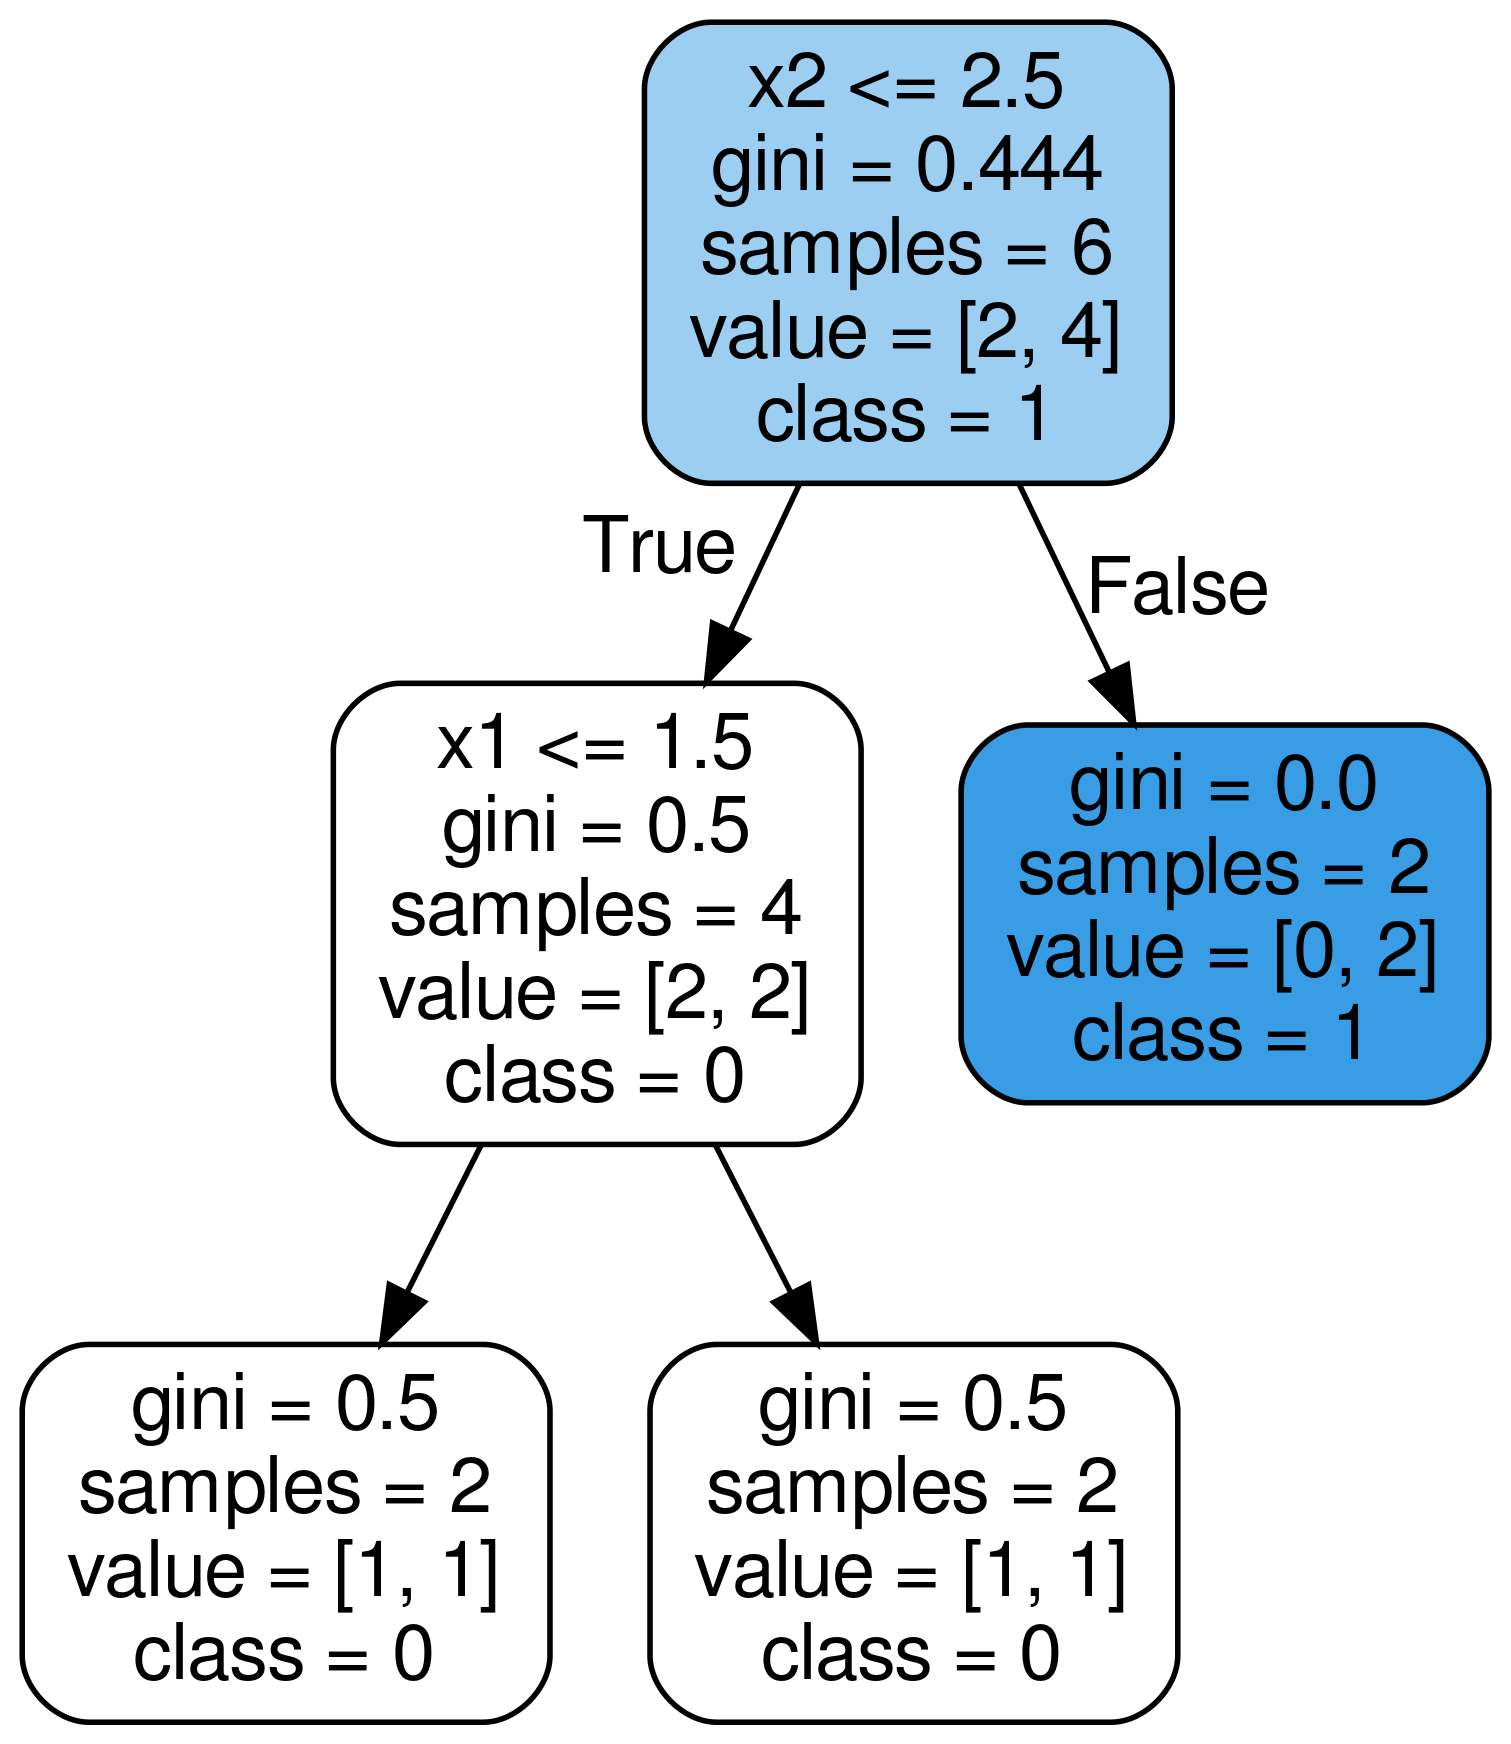

In [14]:
# Export as dot
export_graphviz(short_tree, 'shorttree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

call(['dot', '-Tpng', 'shorttree.dot', '-o', 'shorttree.png', '-Gdpi=400']);
Image('shorttree.png')

Our model no longer gets perfect accuracy on the training data. However, it probably would do better on the testing data since we have limited the maximum depth to prevent overfitting. This is an example of the bias - variance tradeoff in machine learning. A model with high variance has learned the training data very well but often cannot generalize to new points in the test set. On the other hand, a model with high bias has not learned the training data very well because it does not have enough complexity. This model will also not perform well on new points.

Limiting the depth of a single decision tree is one way we can try to make a less biased model. Another option is to use an entire forest of trees, training each one on a random subsample of the training data. The final model then takes an average of all the individual decision trees to arrive at a classification. **This is the idea behind the random forest.**

In [43]:
# Dataset
# The following data set is from the Centers for Disease Control and Prevention (CDC) and includes 
# socioeconomic and lifestyle indicators for hundreds of thousands of individuals. The objective is to 
# predict the overall health of an individual: either 0 for poor health or 1 for good health. We'll limit 
# the data to 100,000 individuals to speed up training.

# The problem is imbalanced (far more of one label than another) so for assessing performance, we'll use 
# recall, precision, receiver operating characteristic area under the curve (ROC AUC), and also plot the 
# ROC curve. Accuracy is not a useful metric when dealing with an imbalanced problem.

df = pd.read_csv('2015.csv').sample(100000, random_state = 0)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
107602,18.0,1.0,b'01112015',b'01',b'11',b'2015',1100.0,2.015004e+09,2.015004e+09,NaN,...,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
370608,48.0,7.0,b'07242015',b'07',b'24',b'2015',1200.0,2.015011e+09,2.015011e+09,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,NaN,NaN,NaN
325628,42.0,11.0,b'11182015',b'11',b'18',b'2015',1100.0,2.015003e+09,2.015003e+09,1.0,...,3.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0
48003,8.0,1.0,b'02102015',b'02',b'10',b'2015',1100.0,2.015011e+09,2.015011e+09,NaN,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
231934,31.0,9.0,b'09292015',b'09',b'29',b'2015',1100.0,2.015003e+09,2.015003e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [44]:
df['_RFHLTH'].value_counts()

1.0    81182
2.0    18527
9.0      291
Name: _RFHLTH, dtype: int64

In [45]:
df = df.select_dtypes('number')

In [46]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df = df.rename(columns = {'_RFHLTH': 'label'})
df['label'].value_counts()

1.0    81182
0.0    18527
Name: label, dtype: int64

In [47]:
# Below, we drop a number of columns that we should not use for modeling (they are different versions of the labels).

# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

In [48]:
# Splitting the data

from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(df.pop('label'))

train, test, train_labels, test_labels = train_test_split(df, labels,
                                                         stratify = labels,
                                                         test_size = 0.3, random_state = 0)
train
test
train_labels
test_labels

array([1., 1., 0., ..., 1., 1., 1.])

In [49]:
# Imputation of Missing values
# We'll fill in the missing values with the mean of the column. It's important to note that we fill in 
# missing values in the test set with the mean of columns in the training data. This is necessary because 
# if we get new data, we'll have to use the training data to fill in any missing values.

train = train.fillna(train.mean())
test = test.fillna(train.mean())

# Feature for Feature importances
features = list(train.columns)

In [50]:
train.shape

(69796, 313)

In [51]:
test.shape

(29913, 313)

In [52]:
# Train tree
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 12523 nodes with maximum depth 63.
